In [6]:
#import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import itertools
import time
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load datasets
aisles = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")

# Explooratory data analysis 

In [3]:
#check for missing values
departments_missing_values = departments.isna().sum()
aisles_missing_values = aisles.isna().sum()
orders_missing_values = orders.isna().sum()
order_products_train_missing_values = order_products_train.isna().sum()
order_products_prior_missing_values = order_products_prior.isna().sum()
products_missing_values = products.isna().sum()

# Display the results
departments_missing_values, aisles_missing_values, orders_missing_values, order_products_train_missing_values, order_products_prior_missing_values, products_missing_values


(department_id    0
 department       0
 dtype: int64,
 aisle_id    0
 aisle       0
 dtype: int64,
 order_id                       0
 user_id                        0
 eval_set                       0
 order_number                   0
 order_dow                      0
 order_hour_of_day              0
 days_since_prior_order    206209
 dtype: int64,
 order_id             0
 product_id           0
 add_to_cart_order    0
 reordered            0
 dtype: int64,
 order_id             0
 product_id           0
 add_to_cart_order    0
 reordered            0
 dtype: int64,
 product_id       0
 product_name     0
 aisle_id         0
 department_id    0
 dtype: int64)

In [4]:
# Display the first few rows of each DataFrame
aisles_head = aisles.head()
departments_head = departments.head()
orders_head = orders.head()
order_products_prior_head = order_products_prior.head()
order_products_train_head = order_products_train.head()
products_head = products.head()

# Display the results
aisles_head, departments_head, orders_head, order_products_prior_head, order_products_train_head, products_head


(   aisle_id                       aisle
 0         1       prepared soups salads
 1         2           specialty cheeses
 2         3         energy granola bars
 3         4               instant foods
 4         5  marinades meat preparation,
    department_id department
 0              1     frozen
 1              2      other
 2              3     bakery
 3              4    produce
 4              5    alcohol,
    order_id  user_id eval_set  order_number  order_dow  order_hour_of_day  \
 0   2539329        1    prior             1          2                  8   
 1   2398795        1    prior             2          3                  7   
 2    473747        1    prior             3          3                 12   
 3   2254736        1    prior             4          4                  7   
 4    431534        1    prior             5          4                 15   
 
    days_since_prior_order  
 0                     NaN  
 1                    15.0  
 2                   

In [5]:
# Analyze each tables

In [6]:
#Product table analysis
print('number of products : ',len(products)) 
print('number of aisles : ', products.aisle_id.nunique())
print('number of departments: ',products.department_id.nunique())


number of products :  49688
number of aisles :  134
number of departments:  21


In [7]:
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [80]:
with open("Pickle/products_desc.p", "wb") as file:
    pickle.dump( products_desc, file)

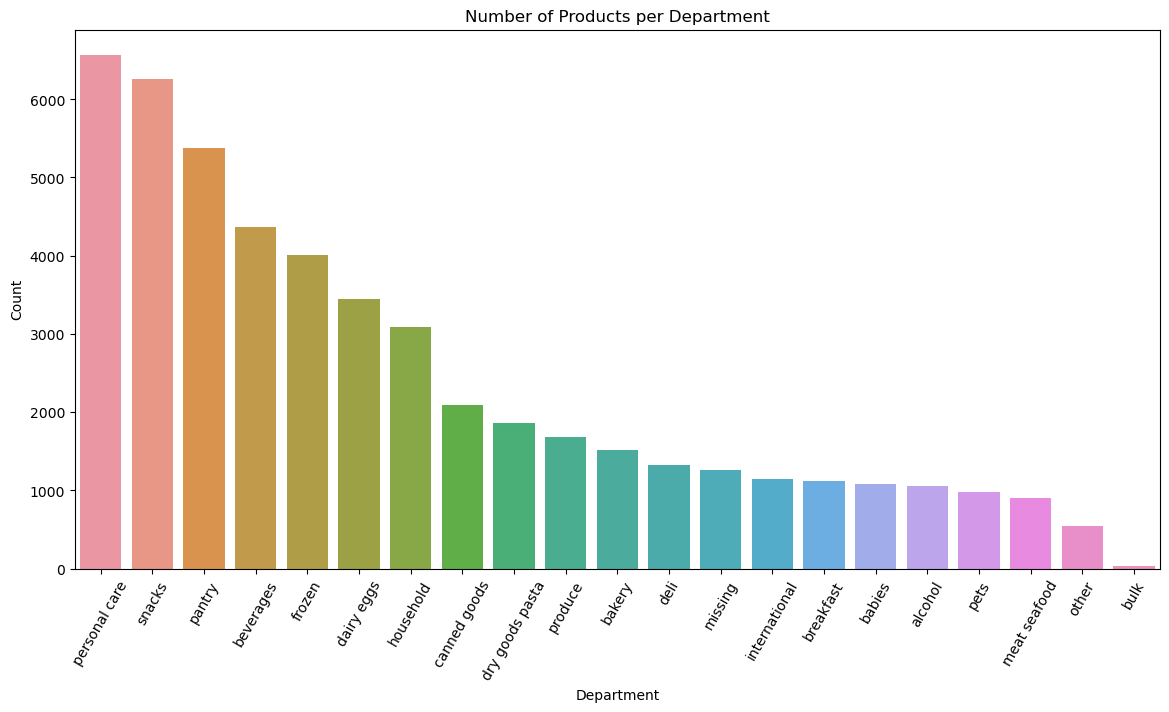

In [8]:
#plot for Number of Products per Department
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.xlabel('Department')
plt.savefig('Images/products_by_department.png');

#plot for Number of Products per Aisle
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= products_desc, order = products_desc.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.savefig('Images/products_by_aisle.png');

In [9]:
products_desc[products_desc['aisle']=='missing']
# 1246 products have 'missing' aisle 45 and department 19


,product_id,product_name,aisle_id,department_id,aisle,department
37,38,Ultra Antibacterial Dish Liquid,100,21,missing,missing
71,72,Organic Honeycrisp Apples,100,21,missing,missing
109,110,Uncured Turkey Bologna,100,21,missing,missing
296,297,"Write Bros Ball Point Pens, Cap-Pen, Medium (1...",100,21,missing,missing
416,417,Classics Baby Binks Easter Chocolate Bunny,100,21,missing,missing
...,...,...,...,...,...,...
49552,49553,Organic Plain Skyr,100,21,missing,missing
49574,49575,Chocolate Vanilla Malt Custard,100,21,missing,missing
49640,49641,"8\"" Pecan Pie",100,21,missing,missing
49663,49664,Lemon Cayenne Drinking Vinegar,100,21,missing,missing


In [10]:
# one to many relationship betweendepartment and aisle
products_desc[products_desc['department']=='snacks']


,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
15,16,Mint Chocolate Flavored Syrup,103,19,ice cream toppings,snacks
24,25,Salted Caramel Lean Protein & Fiber Bar,3,19,energy granola bars,snacks
31,32,Nacho Cheese White Bean Chips,107,19,chips pretzels,snacks
40,41,Organic Sourdough Einkorn Crackers Rosemary,78,19,crackers,snacks
...,...,...,...,...,...,...
49661,49662,Bacon Cheddar Pretzel Pieces,107,19,chips pretzels,snacks
49664,49665,Super Dark Coconut Ash & Banana Chocolate Bar,45,19,candy chocolate,snacks
49665,49666,Ginger Snaps Snacking Cookies,61,19,cookies cakes,snacks
49670,49671,Milk Chocolate Drops,45,19,candy chocolate,snacks


In [11]:
# check that An aisle only belongs to one department
products_desc[products_desc['aisle_id']==47]

,product_id,product_name,aisle_id,department_id,aisle,department
23,24,Tri-Vi-Sol® Vitamins A-C-and D Supplement Drop...,47,11,vitamins supplements,personal care
41,42,Biotin 1000 mcg,47,11,vitamins supplements,personal care
87,88,Probiotics High Potency Capsules,47,11,vitamins supplements,personal care
90,91,Kind Prenatal Once Daily,47,11,vitamins supplements,personal care
158,159,"Calcium Adult Gummy Vitamins, Orange Cherry & ...",47,11,vitamins supplements,personal care
...,...,...,...,...,...,...
49401,49402,Labs Solar D Gems Natural Vitamin D3 2000 IU,47,11,vitamins supplements,personal care
49442,49443,Vitamin D3 5000 Iu,47,11,vitamins supplements,personal care
49478,49479,Xylitol Pure Sweetner,47,11,vitamins supplements,personal care
49570,49571,Chelated Zinc,47,11,vitamins supplements,personal care


In [12]:
#order table analysis
print('number of orders: ',len(orders))
print('minimum order id: ',orders.order_id.min())
print('maxiimum order id: ',orders.order_id.max())


number of orders:  3421083
minimum order id:  1
maxiimum order id:  3421083


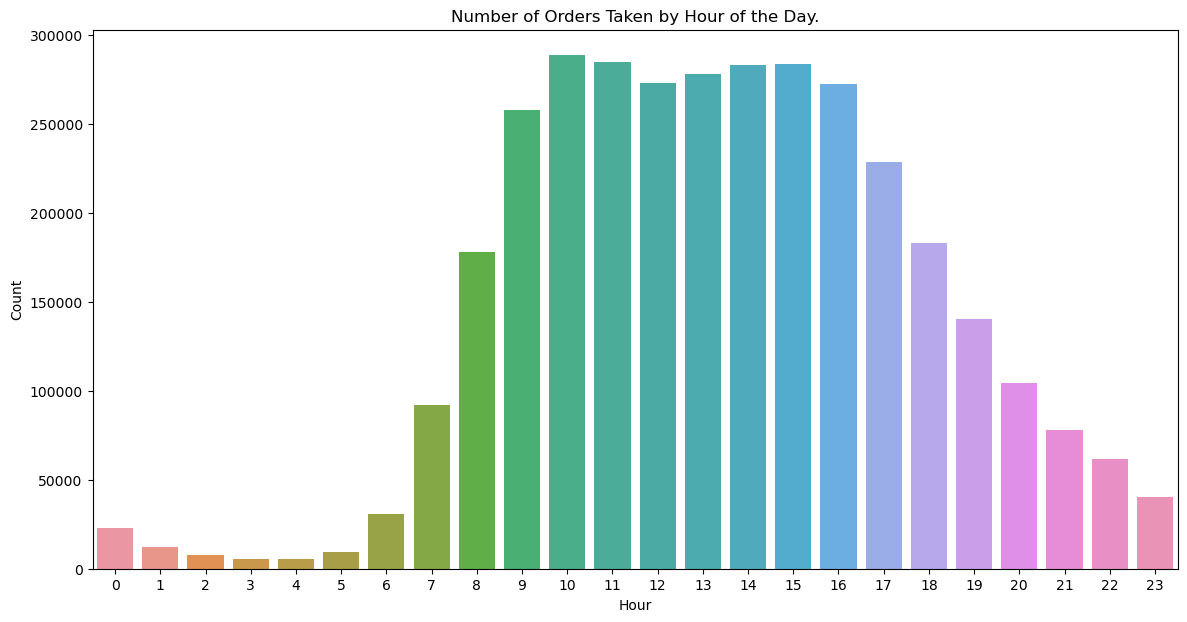

In [13]:
#plot for Number of Orders Taken by Hour of the Day.
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')
plt.savefig('Images/orders_by_hour.png');

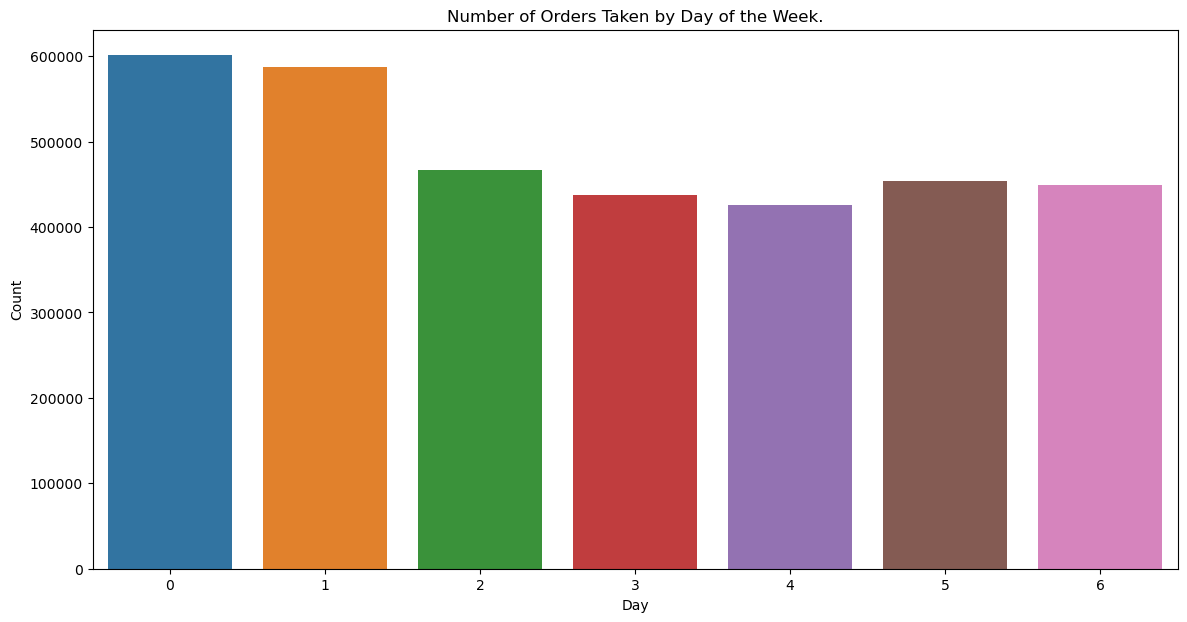

In [14]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')
plt.savefig('Images/orders_by_dow.png');

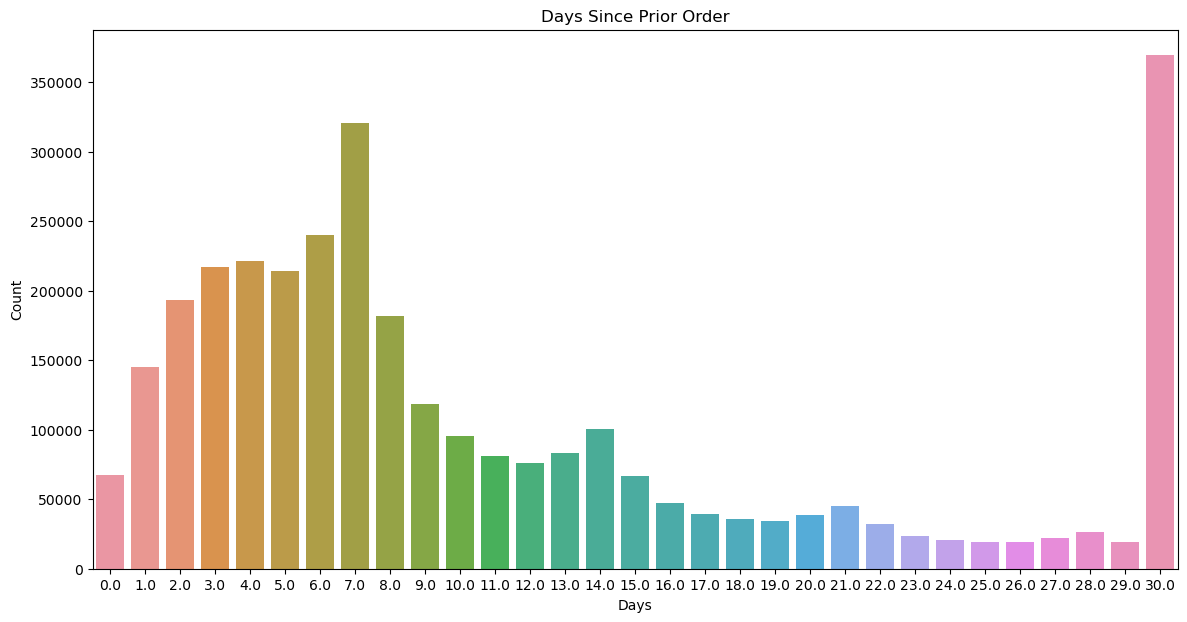

In [15]:
#plot for Days Since Prior Order
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders)
plt.title('Days Since Prior Order')
plt.ylabel('Count')
plt.xlabel('Days')
plt.savefig('Images/days_since_order.png');

In [16]:
orders_test = orders[orders['eval_set']=='test'] # 75000 orders in our test set

orders_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,test,13,5,15,11.0
44,329954,4,test,6,3,12,30.0
53,1528013,6,test,4,3,16,22.0
96,1376945,11,test,8,6,11,8.0
102,1356845,12,test,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,test,23,2,17,6.0
3420929,350108,206204,test,5,4,14,14.0
3421001,1043943,206206,test,68,0,20,0.0
3421018,2821651,206207,test,17,2,13,14.0


In [17]:
#Order_products_train analysis
print('number of order products with that are train evaluation: ',len(order_products_train))
print('minimum of order products with that are train evaluation: ',order_products_train.order_id.min()) 
print('maximum of order products with that are train evaluation:',order_products_train.order_id.max())
print('unique train orders:',order_products_train.order_id.nunique()) 

number of order products with that are train evaluation:  1384617
minimum of order products with that are train evaluation:  1
maximum of order products with that are train evaluation: 3421070
unique train orders: 131209


In [18]:
#Order_products_prior analysis
print('number of order products with that are prior evaluation: ',len(order_products_prior))
print('minimum of order products with that are prior evaluation: ',order_products_prior.order_id.min()) 
print('maximum of order products with that are prior evaluation:',order_products_prior.order_id.max())
print('unique prior orders:',order_products_prior.order_id.nunique()) 

number of order products with that are prior evaluation:  32434489
minimum of order products with that are prior evaluation:  2
maximum of order products with that are prior evaluation: 3421083
unique prior orders: 3214874


In [19]:
order_products_prior[order_products_prior.order_id == 3421083]

,order_id,product_id,add_to_cart_order,reordered
32434479,3421083,7854,1,0
32434480,3421083,45309,2,0
32434481,3421083,21162,3,0
32434482,3421083,18176,4,1
32434483,3421083,35211,5,0
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1
32434488,3421083,5020,10,1


In [20]:
orders[orders.order_id == 3421083]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
419472,3421083,25247,prior,24,2,6,21.0


In [21]:
orders[orders.user_id == 25247]


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
419449,1336704,25247,prior,1,6,16,NaN
419450,1495691,25247,prior,2,0,16,8.0
419451,421337,25247,prior,3,5,16,5.0
419452,431338,25247,prior,4,5,14,7.0
419453,626329,25247,prior,5,1,13,3.0
419454,1110210,25247,prior,6,5,11,4.0
419455,761558,25247,prior,7,4,7,6.0
419456,2870129,25247,prior,8,2,10,5.0
419457,246287,25247,prior,9,0,9,26.0
419458,378235,25247,prior,10,3,15,10.0


In [22]:
len(orders[orders.user_id == 25247])
# user have ordered 28 times.

28

In [23]:
# But what products have they ordered... merging tables will help here
order_products_prior[order_products_prior['order_id'].isin(list(orders[orders.user_id == 25247]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered
2334668,246287,34243,1,0
2334669,246287,16349,2,1
2334670,246287,21183,3,0
2334671,246287,39973,4,0
2334672,246287,10644,5,1
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


# Data preprocessing for model

In [24]:
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [25]:
len(merged_order_products)

33819106

In [26]:

products_per_order = merged_order_products.groupby('order_id').count()

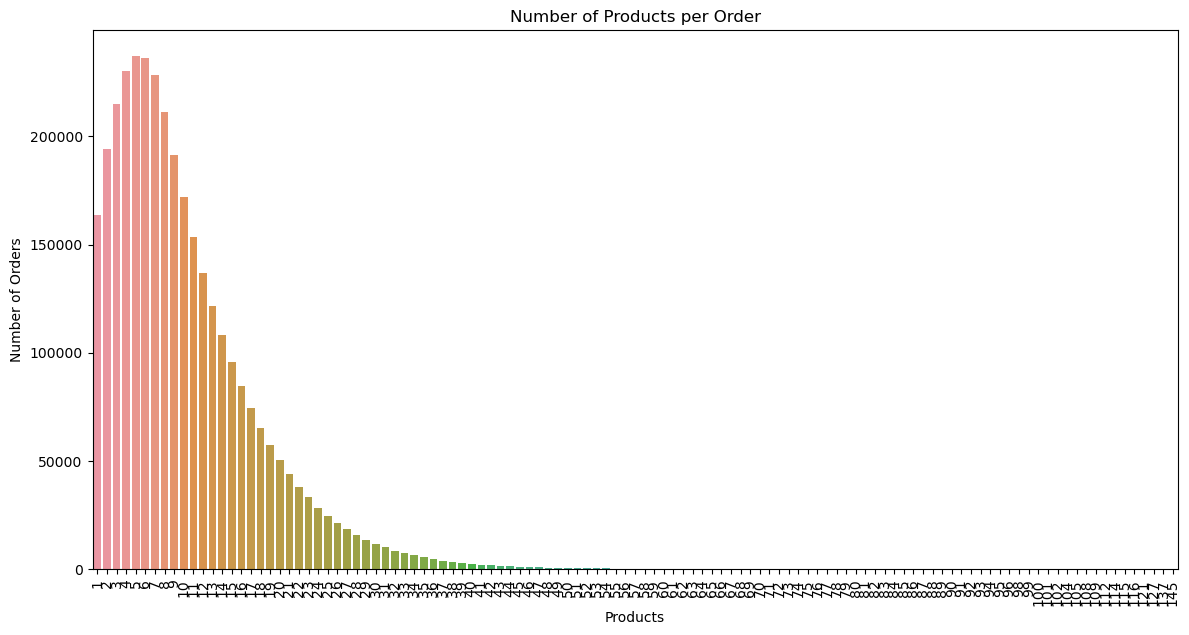

In [27]:
# 5 is the most common number of products per order

plt.figure(figsize = (14,7))
sns.countplot(x='product_id', data = products_per_order)
plt.title('Number of Products per Order')
plt.xticks(rotation=90)
plt.ylabel('Number of Orders')
plt.xlabel('Products')
plt.savefig('Images/product_count_by_order.png');

In [28]:
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,816049,49302,7,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
2,1242203,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
3,1383349,49302,11,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
4,1787378,49302,8,0,Bulgarian Yogurt,120,16,yogurt,dairy eggs


In [29]:
order_products_desc['product_name'].value_counts()

product_name
Banana                             491291
Bag of Organic Bananas             394930
Organic Strawberries               275577
Organic Baby Spinach               251705
Organic Hass Avocado               220877
                                    ...  
Coconut Bliss Pineapple Coconut         1
Salsa, Black Bean                       1
Sweetart Jelly Beans                    1
The Ultimate Caramel Suace              1
Flatbread Pizza All Natural             1
Name: count, Length: 49685, dtype: int64

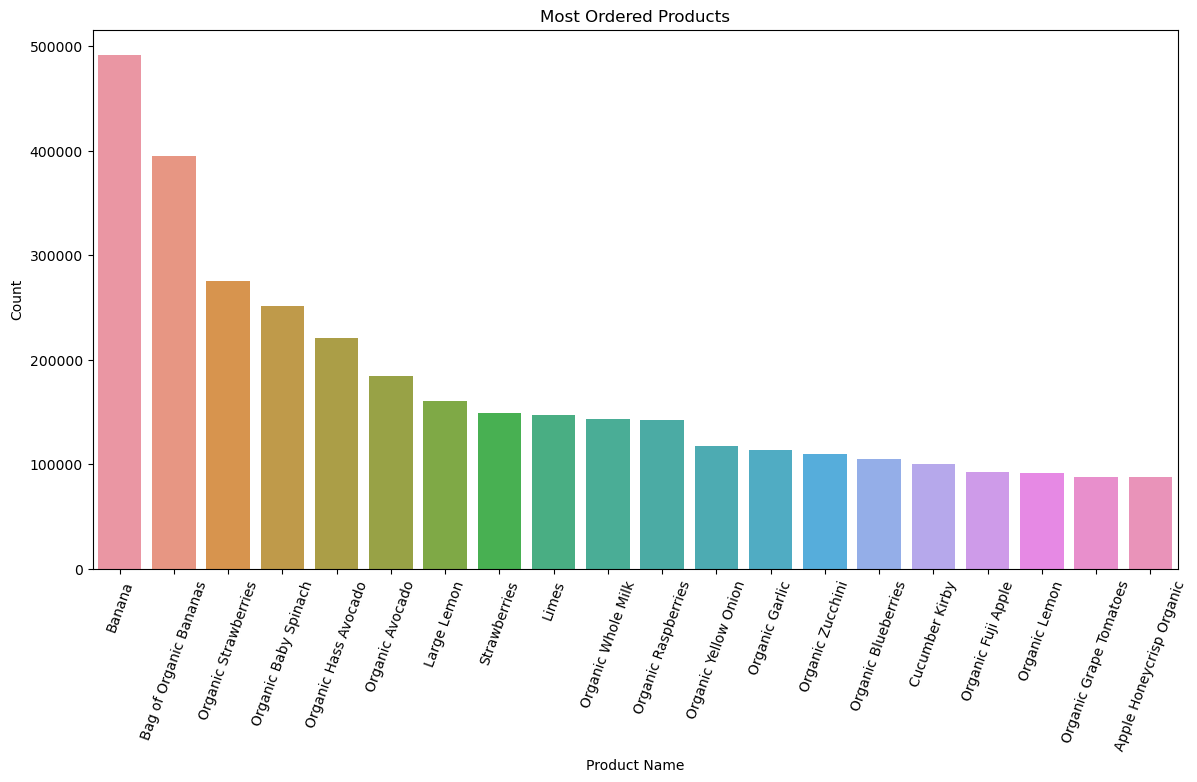

In [30]:
#plot for Most Ordered Products
plt.figure(figsize = (14,7))
sns.countplot(x='product_name', data= order_products_desc, 
              order = order_products_desc.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Name')
plt.savefig('Images/ordered_products_by_name.png');

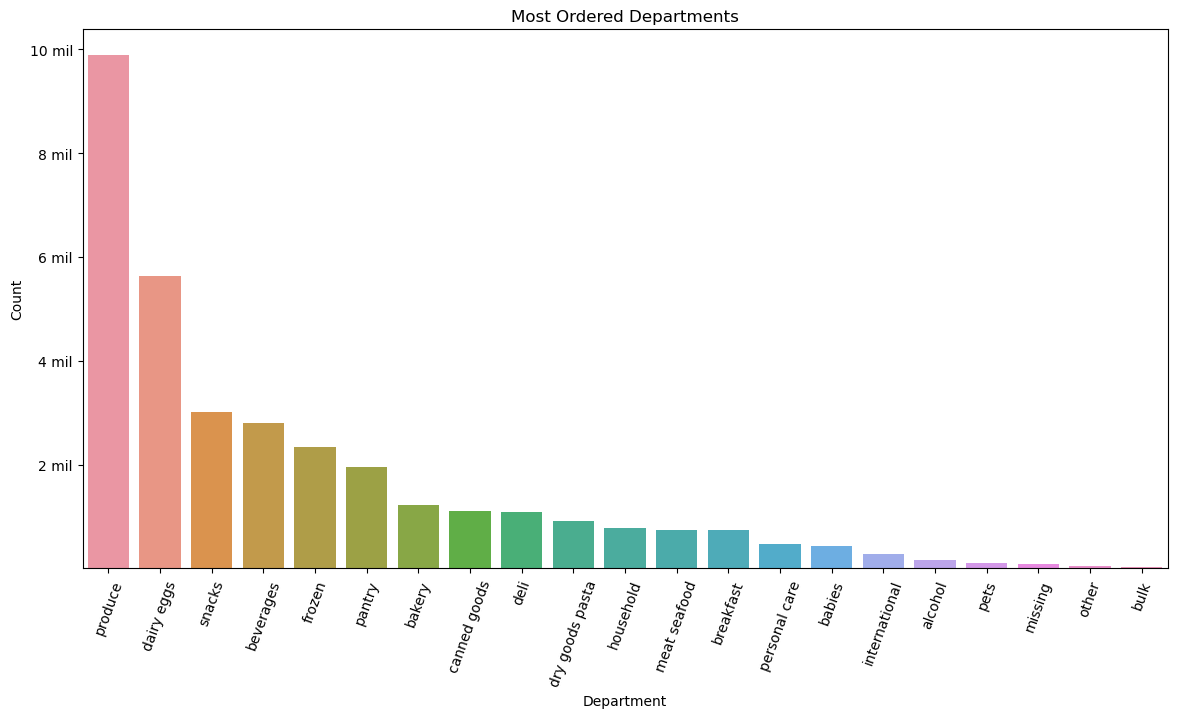

In [31]:
#plot for Most Ordered Departments
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= order_products_desc, order = order_products_desc.department.value_counts().index)
plt.title('Most Ordered Departments')
plt.xticks(rotation=70)
plt.yticks([2000000,4000000,6000000,8000000,10000000],['2 mil','4 mil','6 mil','8 mil','10 mil'])
plt.ylabel('Count')
plt.xlabel('Department')
plt.savefig('Images/ordered_products_by_department.png');

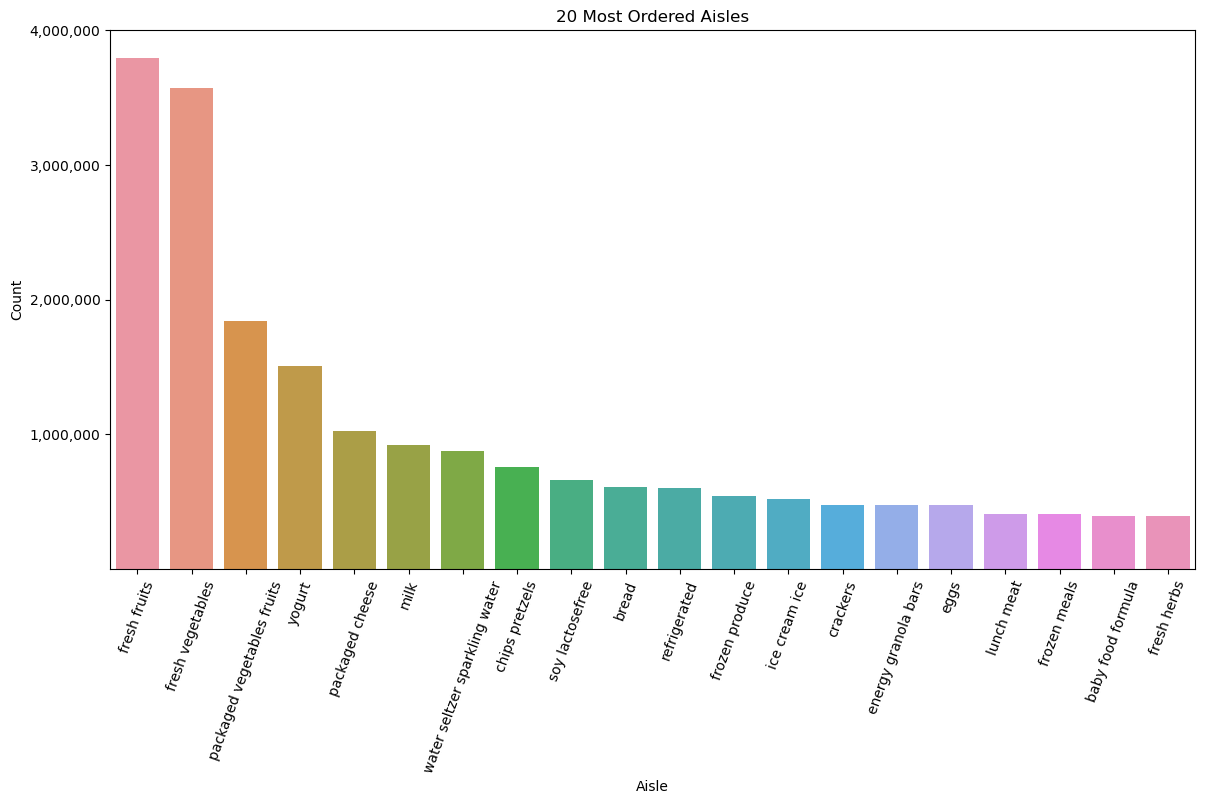

In [32]:
#plot for 20 Most Ordered Aisles
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= order_products_desc, order = order_products_desc.aisle.value_counts().index[:20])
plt.title('20 Most Ordered Aisles')
plt.xticks(rotation=70)
plt.yticks([1000000,2000000,3000000,4000000],['1,000,000','2,000,000','3,000,000','4,000,000'])
plt.ylabel('Count')
plt.xlabel('Aisle')
plt.savefig('Images/ordered_products_by_aisle.png');

In [33]:
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,soft drinks,beverages
1,2539329,1,prior,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks
2,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,soy lactosefree,dairy eggs
3,2539329,1,prior,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,2539329,1,prior,1,2,8,NaN,12427,3,0,Original Beef Jerky,23,19,popcorn jerky,snacks


In [34]:
#Check user with id 7
merged_orders[merged_orders['user_id']==7]['product_name'].value_counts()

product_name
Lactose Free Fat Free Milk           14
Mexican Coffee                       12
Vanilla Coffee Concentrate           12
Organic Strawberries                 10
85% Lean Ground Beef                  9
                                     ..
Organic Half & Half                   1
Salted Sweet Cream Butter             1
Organic Refried Black Beans           1
Whipped Cream Cheese                  1
Panama Peach Antioxidant Infusion     1
Name: count, Length: 69, dtype: int64

# Clustering Algorithm

In [35]:
with open("Pickle/merged_orders.p", "wb") as file:
    pickle.dump( merged_orders, file)

In [36]:
merged_orders = pickle.load(open("Pickle/merged_orders.p", "rb"))

In [37]:
user_info = merged_orders[['user_id', 'order_number', 'order_dow', 'order_hour_of_day', 
                           'days_since_prior_order', 'aisle']]

In [38]:
#get dummy data for aisles
user_data = pd.get_dummies(user_info, prefix=None, columns=['aisle'])

In [39]:
user_data.head(15)

,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
0,1,1,2,8,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,1,2,8,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,1,2,8,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,1,2,8,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,2,8,NaN,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1,2,3,7,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1,2,3,7,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1,2,3,7,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1,2,3,7,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1,2,3,7,15.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
len(user_data)

33819106

In [41]:
print (orders.user_id.max())

206209


In [42]:
user_data1 = user_data[user_data['user_id'] <= 52000]
user_data2 = user_data[(user_data['user_id'] <= 104000) & (user_data['user_id'] > 52000)]
user_data3 = user_data[(user_data['user_id'] <= 156000) & (user_data['user_id'] > 104000)]
user_data4 = user_data[user_data['user_id'] > 156000]

In [43]:
grouped_user1 = user_data1.groupby('user_id').sum()


In [44]:
grouped_user2 = user_data2.groupby('user_id').sum()

In [45]:
grouped_user3 = user_data3.groupby('user_id').sum()

In [46]:
grouped_user4 = user_data4.groupby('user_id').sum()

In [47]:
# Go back to user_data and drop the aisle info before I group the other variables in different ways
user_data1_noaisles = user_data1.iloc[:,:5]
user_data2_noaisles = user_data2.iloc[:,:5]
user_data3_noaisles = user_data3.iloc[:,:5]
user_data4_noaisles = user_data4.iloc[:,:5]

In [48]:
# Cool.  Found a way to group each varaiable differently.
group1 = user_data1_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group2 = user_data2_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group3 = user_data3_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})
group4 = user_data4_noaisles.groupby('user_id').agg({'order_number': 'max', 'order_dow': lambda x:x.value_counts().index[0], 
                                            'order_hour_of_day': 'median', 'days_since_prior_order': 'mean'})

In [49]:
# get number of orders for each user and add to grouped_user dfs
grouped_user1['num_orders'] = group1.order_number
grouped_user2['num_orders'] = group2.order_number
grouped_user3['num_orders'] = group3.order_number
grouped_user4['num_orders'] = group4.order_number

In [50]:
grouped_user1['mean_days_since'] = group1.days_since_prior_order
grouped_user2['mean_days_since'] = group2.days_since_prior_order
grouped_user3['mean_days_since'] = group3.days_since_prior_order
grouped_user4['mean_days_since'] = group4.days_since_prior_order

In [51]:
grouped_user1['mode_order_dow'] = group1.order_dow
grouped_user2['mode_order_dow'] = group2.order_dow
grouped_user3['mode_order_dow'] = group3.order_dow
grouped_user4['mode_order_dow'] = group4.order_dow

In [52]:
grouped_user1['median_order_hour'] = group1.order_hour_of_day
grouped_user2['median_order_hour'] = group2.order_hour_of_day
grouped_user3['median_order_hour'] = group3.order_hour_of_day
grouped_user4['median_order_hour'] = group4.order_hour_of_day

In [53]:
grouped_user1.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user2.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user3.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)
grouped_user4.drop(columns=['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order'], inplace=True)

In [54]:
grouped_users = pd.concat([grouped_user1, grouped_user2, grouped_user3, grouped_user4], axis=0)

In [55]:
grouped_users.head()

,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,aisle_baking ingredients,aisle_baking supplies decor,aisle_beauty,aisle_beers coolers,...,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,num_orders,mean_days_since,mode_order_dow,median_order_hour
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,11,19.200000,4,8.0
2,0,3,0,0,0,0,2,0,0,0,...,0,0,0,2,0,42,15,18.009390,1,10.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,12,11.487179,0,16.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,5,15.357143,4,13.0
5,1,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,5,12.314286,0,16.0


In [56]:
# This function came from a Medium article by Adam Ross Nelson to rearrange columns in a df
def movecol(df, cols_to_move=[], ref_col='', place='After'):
    
    cols = df.columns.tolist()
    if place == 'After':
        seg1 = cols[:list(cols).index(ref_col) + 1]
        seg2 = cols_to_move
    if place == 'Before':
        seg1 = cols[:list(cols).index(ref_col)]
        seg2 = cols_to_move + [ref_col]
    
    seg1 = [i for i in seg1 if i not in seg2]
    seg3 = [i for i in cols if i not in seg1 + seg2]
    
    return(df[seg1 + seg2 + seg3])

In [57]:
grouped_users = movecol(grouped_users, 
             cols_to_move=['num_orders', 'mode_order_dow', 'median_order_hour', 'mean_days_since'], 
             ref_col='aisle_air fresheners candles',
             place='Before')
grouped_users.head()

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,11,4,8.0,19.200000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
2,15,1,10.0,18.009390,0,3,0,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,12,0,16.0,11.487179,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,5,4,13.0,15.357143,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,5,0,16.0,12.314286,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [40]:
pickle.dump(grouped_users, open("Pickle/grouped_users.p", "wb"))


NameError: name 'grouped_users' is not defined

In [41]:
grouped_users = pickle.load(open("Pickle/grouped_users.p", "rb"))

### Run KMeans clustering

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_users = scaler.fit_transform(grouped_users)

In [43]:
scaled_users

array([[-0.31368362,  0.66014607, -1.98290635, ..., -0.37143228,
        -0.08668691, -0.28458752],
       [-0.07361924, -0.72687298, -1.26590407, ..., -0.19699129,
        -0.08668691,  1.85881583],
       [-0.25366752, -1.18921267,  0.88510277, ..., -0.19699129,
        -0.08668691, -0.39175769],
       ...,
       [-0.01360315, -0.72687298, -0.54890179, ...,  0.58799319,
        -0.08668691,  0.41201857],
       [ 1.96692792, -0.2645333 ,  0.16810049, ..., -0.37143228,
        -0.08668691,  1.37655008],
       [-0.13363534, -0.72687298, -0.54890179, ..., -0.37143228,
        -0.08668691, -0.23100244]])

In [68]:
from sklearn.cluster import KMeans
random_state = 42

k_means_18 = KMeans(n_clusters=18, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_19 = KMeans(n_clusters=19, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_20 = KMeans(n_clusters=20, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_21 = KMeans(n_clusters=21, random_state=random_state, algorithm='full').fit(scaled_users)
k_means_22 = KMeans(n_clusters=22, random_state=random_state, algorithm='full').fit(scaled_users)


In [45]:
k_means_list = [k_means_18, k_means_19, k_means_20, k_means_21, k_means_22]

In [46]:
from sklearn.metrics import calinski_harabasz_score

CH_score = []

for model in k_means_list:
    labels = model.labels_
    CH_score.append(calinski_harabasz_score(grouped_users, labels))

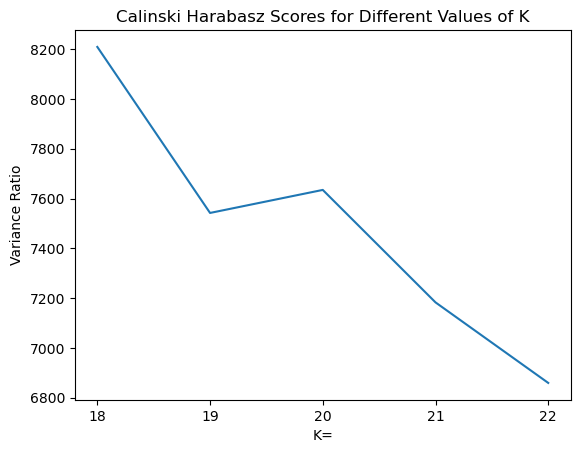

In [47]:

plt.plot([18, 19, 20, 21, 22], CH_score)
plt.xticks([18,19,20,21,22])
plt.title('Calinski Harabasz Scores for Different Values of K')
plt.ylabel('Variance Ratio')
plt.xlabel('K=')
plt.savefig('Images/ch_scaled_scores.png');

In [48]:
# Looking at Within Cluster Sum of Squares

wcss_score = []

for model in k_means_list:
    labels = model.labels_
    wcss_score.append(model.inertia_)

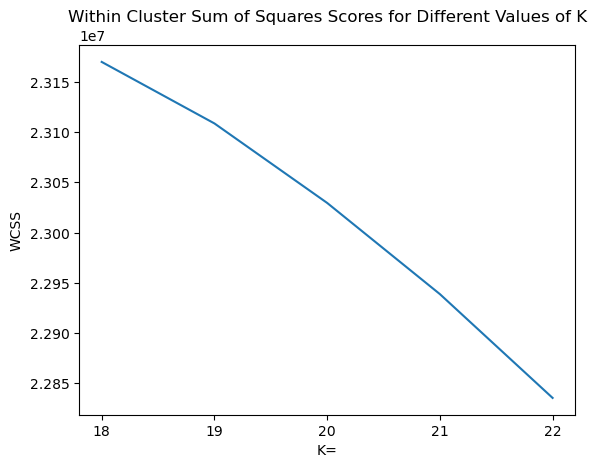

In [49]:
plt.plot([18, 19, 20, 21, 22], wcss_score)
plt.xticks([18,19,20,21,22])
plt.title('Within Cluster Sum of Squares Scores for Different Values of K')
plt.ylabel('WCSS')
plt.xlabel('K=')
plt.savefig('Images/wcss_scores.png');

In [70]:
# Silhouette score 
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_18.labels_, sample_size = 50000, random_state = random_state)

0.1870172557451071

In [71]:
# Silhouette score 
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_19.labels_, sample_size = 50000, random_state = random_state)

-0.05276332698310788

In [69]:
# Silhouette score 
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_20.labels_, sample_size = 50000, random_state = random_state)

0.1747106774875764

In [72]:
# Silhouette score 
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_21.labels_, sample_size = 50000, random_state = random_state)

-0.04645162882105265

In [73]:
# Silhouette score 
from sklearn import metrics
metrics.silhouette_score(grouped_users, k_means_22.labels_, sample_size = 50000, random_state = random_state)

-0.04576626733671961

In [74]:
# k_means_18 is the best cluster 

k_means_18.labels_

array([ 1,  3,  1, ...,  3, 16,  3], dtype=int32)

In [75]:
pickle.dump(k_means_18, open("Pickle/k_means_18.p", "wb"))
k_means_18 = pickle.load(open("Pickle/k_means_18.p", "rb"))

In [76]:
# Add cluster assignment to the grouped_users dataframe
grouped_users['cluster'] = k_means_18.labels_
pickle.dump(grouped_users, open('Pickle/clustered_users.p', 'wb'))

# CLUSTER ANALYSIS

In [77]:
grouped_users.cluster.value_counts()

cluster
1     112422
3      46785
11     12181
13     10938
0       7942
16      5359
5       2183
14      1764
15      1223
8       1138
10       961
4        792
6        760
7        657
12       643
9        199
2        157
17       105
Name: count, dtype: int64

In [78]:
cluster_data = grouped_users.groupby('cluster').median()
cluster_data 

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_spreads,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt
cluster,,,,,,,,,,,,,,,,,,,,,
0,17.0,3.0,14.0,13.615283,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0
1,6.0,2.0,14.0,18.880000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55.0,2.0,13.0,6.331492,0.0,1.0,12.0,0.0,8.0,0.0,...,4.0,2.0,0.0,1.0,0.0,0.0,0.0,9.0,0.0,23.0
3,14.0,2.0,14.0,13.483221,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0
4,59.0,2.0,11.0,6.103038,0.0,1.0,0.0,0.0,0.0,0.0,...,6.0,21.0,0.0,0.0,0.0,0.0,0.0,34.5,0.0,67.0
5,61.0,2.0,13.0,6.156080,0.0,4.0,0.0,0.0,0.0,0.0,...,5.0,2.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,23.0
6,36.0,3.0,14.0,9.178974,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,5.0
7,31.0,3.0,13.0,8.439394,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,10.0,1.0
8,46.0,2.0,13.0,7.644048,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,1.0,0.0,1.0,0.0,3.0,0.0,9.0,0.0,13.0


In [79]:
grouped_users[grouped_users['cluster'] == 7]

,num_orders,mode_order_dow,median_order_hour,mean_days_since,aisle_air fresheners candles,aisle_asian foods,aisle_baby accessories,aisle_baby bath body care,aisle_baby food formula,aisle_bakery desserts,...,aisle_tea,aisle_tofu meat alternatives,aisle_tortillas flat bread,aisle_trail mix snack mix,aisle_trash bags liners,aisle_vitamins supplements,aisle_water seltzer sparkling water,aisle_white wines,aisle_yogurt,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
17,41,5,13.0,8.707071,0,0,0,0,0,0,...,0,0,0,0,0,0,36,32,6,7
310,100,4,10.0,3.160243,0,14,0,0,0,0,...,7,0,0,0,0,3,1,9,0,7
599,33,1,16.0,5.674699,0,1,0,0,0,0,...,3,0,1,0,0,0,13,0,0,7
1285,46,0,14.0,3.953795,0,1,0,0,0,0,...,1,0,5,0,0,0,31,14,4,7
1705,34,5,13.0,11.210714,0,1,0,0,0,0,...,0,0,0,0,0,0,0,2,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204556,9,1,15.0,21.314554,0,3,0,0,0,0,...,1,0,0,0,0,1,10,4,31,7
204981,34,0,13.0,7.978903,0,5,0,0,0,5,...,0,0,1,0,0,0,2,31,3,7
205325,42,4,14.0,5.255725,0,0,0,0,0,0,...,0,0,0,0,0,0,9,6,419,7


In [80]:
cluster_data.iloc[7,(cluster_data.loc[7].values > 0)]

num_orders                             31.000000
mode_order_dow                          3.000000
median_order_hour                      13.000000
mean_days_since                         8.439394
aisle_baking ingredients                1.000000
aisle_beers coolers                     6.000000
aisle_bread                             1.000000
aisle_chips pretzels                    4.000000
aisle_condiments                        1.000000
aisle_crackers                          1.000000
aisle_eggs                              1.000000
aisle_fresh dips tapenades              1.000000
aisle_fresh fruits                      7.000000
aisle_fresh vegetables                  5.000000
aisle_ice cream ice                     1.000000
aisle_juice nectars                     1.000000
aisle_milk                              2.000000
aisle_other creams cheeses              1.000000
aisle_packaged cheese                   3.000000
aisle_packaged vegetables fruits        4.000000
aisle_paper goods   

In [81]:
# Convert to three dimensional for graphing
from sklearn.manifold import TSNE
cluster_embedded = TSNE(n_components=3, perplexity=10, random_state=42).fit_transform(cluster_data)

In [82]:
# Create dataframe to plot
cluster_embedded_df = pd.DataFrame(cluster_embedded, index = cluster_data.index, columns = ['1','2','3'])
cluster_embedded_df.reset_index(inplace=True)
cluster_embedded_df

,cluster,1,2,3
0,0,-44.266132,-30.575542,84.244484
1,1,-50.722939,58.366287,87.017555
2,2,139.107391,45.240429,43.584759
3,3,45.459656,41.960922,-42.530083
4,4,112.694313,-61.135193,-81.612312
5,5,125.865562,-56.413658,38.198814
6,6,-2.620528,2.829724,15.060526
7,7,-34.037556,79.881088,-2.695444
8,8,6.147134,-81.618134,-64.451836
9,9,-66.357620,-7.792236,-44.093704


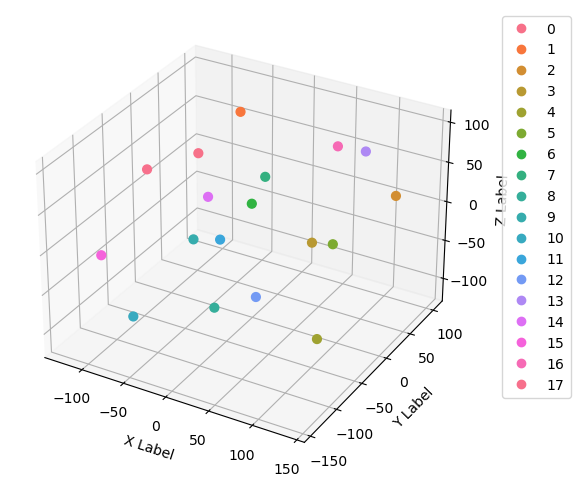

In [85]:
import re
import seaborn as sns
import numpy as np
import pandas as pd  # Assuming 'cluster_embedded_df' is a DataFrame
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Assuming 'cluster_embedded_df' is a DataFrame with columns '1', '2', '3', and 'cluster'

# axes instance
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(cluster_embedded_df['1'], cluster_embedded_df['2'], cluster_embedded_df['3'],
                s=40, c=cluster_embedded_df['cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# legend
plt.legend(*sc.legend_elements(num=18), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("Images/scatter_hue.png", bbox_inches='tight')
plt.show()  # Added plt.show() to display the plot



In [86]:
import plotly.express as px

fig = px.scatter_3d(cluster_embedded_df, x='1', y='2', z='3', color='cluster')
fig.show()

## NLP Metadata search engine

In [91]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [92]:
products_desc = pickle.load(open("Pickle/products_desc.p", "rb"))

### Create the metadata and fit to a vectorizer

In [93]:
products_desc['metadata'] = products_desc.apply(lambda x : x['aisle']+' '+x['department']+' '+x['product_name'], axis = 1)

In [94]:
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department,metadata
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...


In [95]:
count_vec = CountVectorizer(stop_words='english')
count_vec_matrix = count_vec.fit_transform(products_desc['metadata'])

In [96]:
count_vec_matrix.shape

(49688, 10624)

In [97]:
# This function takes in any words and vectorizes them, then finds similar vector in the count_vec_matrix

def vectorize_products_based_on_metadata(product_input):

    vec = count_vec.transform(pd.Series(product_input))
    
    simil = cosine_similarity(vec, count_vec_matrix)
    
    simil_scores = pd.DataFrame(simil.reshape(49688,), index = products_desc.index, columns=['score'])
    
    # Don't return scores of zero, only as many positive scores as exist
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    
    return (products_desc['product_name'].iloc[similarity_scores.index])

In [99]:
vectorize_products_based_on_metadata('mint')

22834                       Chewy Mint
33637                       Mint Rolls
38737                 Mints Pep O Mint
13612                  Berry Mint Gems
24823                 Chewy Fruit Mint
3366              Peppermint Mint Roll
18230                    Cool Mint Tin
25374                Cinnamon Mint Tin
3034     Mints, Sugar Free, Pep O Mint
2272                    Sweet Mint Gum
Name: product_name, dtype: object

In [100]:
vectorize_products_based_on_metadata('fakeword') # Showing edge case of no matches

No similar products found.  Please refine your search terms and try again


### Stem the product metadata and refit

These are mostly proper names of products so I don't think I want to lemmatize as that may change the product name too much.

In [101]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

In [102]:
stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list]))
    stem_list.append(' '.join(stem_set))

In [103]:
from collections import defaultdict
word_count=defaultdict(int)
for idx, product in enumerate(stem_list):
    for word in product.split():
        word_count[word] +=1

In [104]:
# trying to figure out how to make this smaller for FLASK
# Can I remove words only used once?

word_ones=[]
for word, count in word_count.items():
    if count == 1:
        word_ones.append(word)

In [105]:
len(word_ones)

4503

In [106]:
new_stem_list=[]
for i in range(len(products_desc['metadata'])):
    word_list = nltk.word_tokenize(products_desc['metadata'][i])
    stem_set = list(set([stemmer.stem(word) for word in word_list if stemmer.stem(word) not in word_ones]))
    new_stem_list.append(' '.join(stem_set))        

In [107]:
products_desc['stemmed'] = stem_list
products_desc['new_stemmed'] = new_stem_list

In [108]:
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,cake snack sandwich cooki chocol,cake snack sandwich cooki chocol
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,pantri season salt all-season spice,season salt pantri spice
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,oolong golden unsweeten tea beverag robust,oolong golden unsweeten tea beverag robust
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,favorit mini frozen rigatoni smart meal vodka ...,favorit mini frozen rigatoni smart meal vodka ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,green prepar anytim pantri meat chile sauc mar...,green prepar anytim pantri meat chile sauc mar...


In [109]:
products_desc.to_pickle("Pickle/products_desc_stemmed.p")

In [110]:
products_desc_stemmed = pickle.load(open("Pickle/products_desc_stemmed.p", "rb"))

In [111]:
# Passing pieces of dataframe in FLASK to be put back together there
pickle.dump(products_desc_stemmed.columns.values,open('Pickle/columns.p','wb'))
pickle.dump(products_desc_stemmed.index.values, open('Pickle/prod_index.p', 'wb'))
pickle.dump(products_desc_stemmed.product_name.values, open('Pickle/prod_name.p', 'wb'))
pickle.dump(products_desc_stemmed.aisle.values, open('Pickle/prod_aisle.p', 'wb'))
pickle.dump(products_desc_stemmed.product_id.values, open('Pickle/prod_id.p', 'wb'))

In [112]:
products_desc_stemmed.product_name.values

array(['Chocolate Sandwich Cookies', 'All-Seasons Salt',
       'Robust Golden Unsweetened Oolong Tea', ..., 'Artisan Baguette',
       'Smartblend Healthy Metabolism Dry Cat Food',
       'Fresh Foaming Cleanser'], dtype=object)

In [113]:
products_desc_stemmed

,product_id,product_name,aisle_id,department_id,aisle,department,metadata,stemmed,new_stemmed
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks,cookies cakes snacks Chocolate Sandwich Cookies,cake snack sandwich cooki chocol,cake snack sandwich cooki chocol
1,2,All-Seasons Salt,104,13,spices seasonings,pantry,spices seasonings pantry All-Seasons Salt,pantri season salt all-season spice,season salt pantri spice
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages,tea beverages Robust Golden Unsweetened Oolong...,oolong golden unsweeten tea beverag robust,oolong golden unsweeten tea beverag robust
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen,frozen meals frozen Smart Ones Classic Favorit...,favorit mini frozen rigatoni smart meal vodka ...,favorit mini frozen rigatoni smart meal vodka ...
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry,marinades meat preparation pantry Green Chile ...,green prepar anytim pantri meat chile sauc mar...,green prepar anytim pantri meat chile sauc mar...
...,...,...,...,...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits,alcohol,"spirits alcohol Vodka, Triple Distilled, Twist...","vodka of distil twist alcohol , spirit vanilla...","vodka of distil twist alcohol , spirit vanilla..."
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian,frozen,frozen vegan vegetarian frozen En Croute Roast...,vegetarian crout frozen hazelnut vegan roast c...,vegetarian frozen hazelnut vegan roast cranber...
49685,49686,Artisan Baguette,112,3,bread,bakery,bread bakery Artisan Baguette,bread bakeri artisan baguett,bread bakeri artisan baguett
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care,pets,cat food care pets Smartblend Healthy Metaboli...,cat food healthi care dri metabol smartblend pet,cat food healthi care dri metabol smartblend pet


In [114]:
np.array(products_desc['stemmed'])[0]

'cake snack sandwich cooki chocol'

In [115]:
# Fitting the vectorizer
stem_count_vec = CountVectorizer(stop_words='english')
stem_count_vec_matrix = stem_count_vec.fit_transform(products_desc['stemmed'])

In [116]:
stem_count_vec_matrix.shape # reduced the size from 10624 to 9086 words

(49688, 9086)

In [117]:
# Fitting the vectorizer with one time words removed
new_stem_count_vec = CountVectorizer(stop_words='english')
new_stem_count_vec_matrix = new_stem_count_vec.fit_transform(products_desc['new_stemmed'])

In [118]:
new_stem_count_vec_matrix.shape

(49688, 5310)

In [119]:
pickle.dump(stem_count_vec, open("Pickle/stem_count_vec.p", "wb"))
pickle.dump(stem_count_vec_matrix, open("Pickle/stem_count_vec_matrix.p", "wb"))
pickle.dump(new_stem_count_vec, open("Pickle/new_stem_count_vec.p", "wb"))
pickle.dump(new_stem_count_vec_matrix, open("Pickle/new_stem_count_vec_matrix.p", "wb"))

In [120]:
# This improved function takes in any words and stems and vectorizes them

def stem_and_vectorize_products_based_on_metadata(product_input):

    word_list = nltk.word_tokenize(product_input)

    input_stemmed = ' '.join([stemmer.stem(word) for word in word_list])

    vec = stem_count_vec.transform(np.array(input_stemmed).reshape(1,)) # changed to array instead of Series for time
    
    simil = cosine_similarity(vec, stem_count_vec_matrix)
    
    simil_scores = pd.DataFrame(simil.reshape(stem_count_vec_matrix.shape[0],), 
                                index = products_desc.index, columns=['score'])
    
    # Don't return scores of zero, only as many positive scores as exist
    non_zero_scores = simil_scores[simil_scores['score'] > 0]
    
    if len(non_zero_scores) == 0:
        print('No similar products found.  Please refine your search terms and try again')
        return
    
    if len(non_zero_scores) < 10:
        item_count = len(non_zero_scores)
    else:
        item_count = 10
    
    similarity_scores = simil_scores.sort_values(['score'], ascending=False)[:item_count]
    
    return (products_desc['product_name'].iloc[similarity_scores.index])

In [123]:
# rather than just printing out I want to store the recs to use in FLASK
recs = stem_and_vectorize_products_based_on_metadata('mint') 

In [124]:
recs

20648    Refresh-Mint Chewing Gum
35929               Holland Mints
14639          Lemonade With Mint
21140                  3 Mint Tea
37165           Yogurt Mint Sauce
37290                 Peppermints
39178                 Chewy Mints
45339     Fresh Garden Mint Sauce
1064                   Freshmints
20366            Natural Mint Gum
Name: product_name, dtype: object

In [125]:
# Looking at how to access the data while I am in FLASK
recs.iloc[0]

'Refresh-Mint Chewing Gum'

In [126]:
recs.index[0]

20648

In [128]:
recs2 = stem_and_vectorize_products_based_on_metadata('fakdeword')

No similar products found.  Please refine your search terms and try again


In [129]:
type(recs2)

NoneType

In [130]:
stem_and_vectorize_products_based_on_metadata('Red Potatoes')

28373                      Red Potato
9637               Bagged Red Potatos
13732                    Red Potatoes
29042    Organic Roasted Red Potatoes
29138              Red Creamer Potato
18655              Organic Red Potato
27876    Roasted Organic Red Potatoes
3492                Baby Red Potatoes
42904         Potato Chips, Red Curry
5651             Organic Red Potatoes
Name: product_name, dtype: object

## Surprise recommendation model

The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.

### Prepare data for recommendation system

In [131]:
# Ok so I need user_id, product_id, and 'number of times it was purchased'
user_item = merged_orders[['user_id', 'product_id', 'reordered']] # Maybe I can use the reordered flag to increment

In [132]:
# About 20 million duplicates.  That is a person ordering an item more than once.
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
6,1,196,1
7,1,26088,1
10,1,12427,1
11,1,196,1
13,1,10258,1
...,...,...,...
33819094,206209,16168,1
33819098,206209,24852,1
33819099,206209,39216,1
33819100,206209,9405,1


In [133]:
# Ah this is what I need.  The value counts of each product id for each user.

user_item[user_item['user_id']==1].product_id.value_counts()

product_id
196      11
12427    10
10258    10
25133     9
13032     4
46149     4
26405     3
26088     3
49235     3
13176     2
38928     2
39657     2
14084     1
30450     1
41787     1
17122     1
10326     1
35951     1
27845     1
Name: count, dtype: int64

In [137]:
# Started at 8:51pm, ended 11:13pm

# Creates list of data tuples of user, product, count

data=[]
data_columns=['user_id','product_id','count']
for user in user_item.user_id.unique():
    counts = user_item[user_item['user_id']==user].product_id.value_counts()
    for i in range(len(counts)):
        data.append([user, counts.index[i], counts.values[i]])

In [138]:
# Began 11:13pm, ended 11:24

# Makes dataframe for recommender

# Now I am consolidated down to 13.8 million rows

rec_df = pd.DataFrame(data, columns=data_columns)
rec_df

,user_id,product_id,count
0,1,196,11
1,1,12427,10
2,1,10258,10
3,1,25133,9
4,1,13032,4
...,...,...,...
13863741,206209,23909,1
13863742,206209,48697,1
13863743,206209,755,1
13863744,206209,6825,1


In [139]:
pickle.dump(rec_df, open("Pickle/rec_df.p", "wb"))

In [7]:
rec_df = pickle.load(open("Pickle/rec_df.p", "rb"))
len(rec_df)

13863746

In [8]:
rec_df['rating'] = rec_df['count'].apply(lambda x: 5 if (x >= 5) else x)

In [9]:
rec_df[rec_df['user_id']==1]

,user_id,product_id,count,rating
0,1,196,11,5
1,1,12427,10,5
2,1,10258,10,5
3,1,25133,9,5
4,1,13032,4,4
5,1,46149,4,4
6,1,26405,3,3
7,1,26088,3,3
8,1,49235,3,3
9,1,13176,2,2


In [10]:
new_rec_df = rec_df.drop(columns='count')
new_rec_df.head()

,user_id,product_id,rating
0,1,196,5
1,1,12427,5
2,1,10258,5
3,1,25133,5
4,1,13032,4


In [11]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy

In [12]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(new_rec_df, reader)

# sample random trainset and testset
trainset, testset = train_test_split(rec_data, test_size=0.20, random_state=12)

In [9]:

svd_algo = SVD()


svd_algo.fit(trainset)


svd_algo_predictions = svd_algo.test(testset)


# Then compute RMSE
accuracy.rmse(svd_algo_predictions)

# 3.46 RMSE on a scale of 1-5 is pretty darn good, but my data is so skewed it may be misleading.

RMSE: 1.2992


1.2991581328371866

In [10]:
pickle.dump(svd_algo, open("Pickle/svd_algo.p", "wb"))

In [11]:
pickle.dump(svd_algo_predictions, open("Pickle/svd_algo_predictions.p", "wb"))

In [12]:
svd_algo = pickle.load(open("Pickle/svd_algo.p", "rb"))

In [14]:
svd_algo_predictions = pickle.load(open("Pickle/svd_algo_predictions.p", "rb"))

In [15]:
# Picking a random user to look at one of their ratings

rec_df[rec_df['user_id'] == 123890]

,user_id,product_id,count,rating
8349299,123890,44632,39,5
8349300,123890,24852,30,5
8349301,123890,14947,23,5
8349302,123890,45570,23,5
8349303,123890,26620,22,5
...,...,...,...,...
8349387,123890,41565,1,1
8349388,123890,36929,1,1
8349389,123890,17284,1,1
8349390,123890,38656,1,1


In [16]:
uid=196
iid=27344
pred = svd_algo.predict(uid, iid, r_ui=2, verbose=True)

user: 196        item: 27344      r_ui = 2.00   est = 1.43   {'was_impossible': False}


In [17]:
# Examining the first record in my test set for its actual value
testset[6]

(123890, 22035, 5.0)

In [18]:
# Prediction is 1.15
pred = svd_algo.predict(123890, 22035, r_ui=5, verbose=True)

user: 123890     item: 22035      r_ui = 5.00   est = 3.09   {'was_impossible': False}


In [20]:
svd_algo_predictions[6]

Prediction(uid=123890, iid=22035, r_ui=5.0, est=3.091090936395789, details={'was_impossible': False})

### Perform a grid search

In [13]:
param_grid = {'n_factors': [20, 100], 'n_epochs': [5, 10], 'lr_all': [0.002, 0.005], 'reg_all': [0.4, 0.6]}

gs_model = GridSearchCV(SVD, param_grid=param_grid, n_jobs=-1, joblib_verbose=1)
gs_model.fit(rec_data)

# Get the best parameters and the corresponding RMSE score
best_params = gs_model.best_params['rmse']
best_score = gs_model.best_score['rmse']


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 149.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 304.3min finished


In [15]:
best_params

{'n_factors': 20, 'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}

In [18]:
pickle.dump(best_params, open("Pickle/best_params.p", "wb"))

In [16]:
best_score

1.26354903853599

In [19]:
pickle.dump(best_score, open("Pickle/best_score.p", "wb"))

In [14]:
pickle.dump(gs_model, open("Pickle/gs_model.p", "wb"))

In [20]:
gs_model = pickle.load(open("Pickle/gs_model.p", "rb"))

In [21]:
results_df = pd.DataFrame.from_dict(gs_model.cv_results)

In [23]:
# Creating the model from the best params


svd_best_gs = SVD(n_factors = 20, n_epochs = 10, lr_all = 0.005, reg_all = 0.4)

svd_best_gs.fit(trainset)


svd_best_gs_predictions = svd_best_gs.test(testset)



# compute RMSE
accuracy.rmse(svd_best_gs_predictions)

# RMSE went down on grid search model from 1.299 to 1.264

RMSE: 1.2644


1.264400822538309

In [39]:
uid=196
iid=27344
pred = svd_best_gs.predict(uid, iid, r_ui=2, verbose=True)

user: 196        item: 27344      r_ui = 2.00   est = 1.81   {'was_impossible': False}


In [24]:
pickle.dump(svd_best_gs, open("Pickle/svd_best_gs.p", "wb"))

In [25]:
pickle.dump(svd_best_gs_predictions, open("Pickle/svd_best_gs_predictions.p", "wb"))

In [27]:
svd_best_gs = pickle.load(open("Pickle/svd_best_gs.p", "rb"))

In [28]:
svd_best_gs_predictions = pickle.load(open("Pickle/svd_best_gs_predictions.p", "rb"))

In [29]:
# Get top predictions for a user

from collections import defaultdict

def get_top_n(predictions, n=6):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [30]:
top_n = get_top_n(svd_best_gs_predictions, n=6) 

In [52]:
top_n[8] # this will give a list fof recommendations product_id and ratings for for user_id 8

[(21903, 1.726822479536281),
 (28985, 1.5883914155417516),
 (17794, 1.4003240825882548),
 (18531, 1.374301062697449),
 (14992, 1.3695651801820485),
 (48121, 1.3623959914691792)]